<a href="https://colab.research.google.com/github/rahulnegi20/The-Spark-Foundation-Task-Data-Science-/blob/main/clusterising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* ### Author - | Rahul Negi 


# Task -2  | Prediction Using Unsupervised ML
## From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

* ### Data :- https://bit.ly/3kXTdox
 

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#importing dataset
iris_df = pd.read_csv('drive/My Drive/ML-DATA/Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

we have no missing data :)!

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


All our data is in int or float so we don't need to worry 

### Finding the required number of K(clusters)


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

x = iris_df.iloc[:, [0, 1, 2, 3, 4]].values
x[:5]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

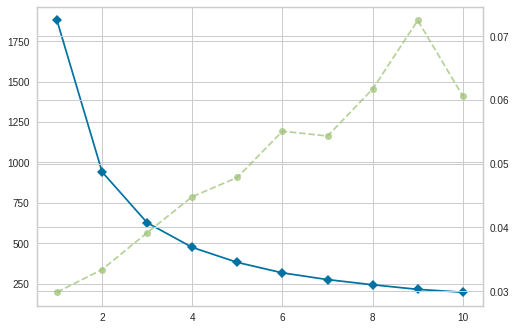

In [ ]:

model = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
#model.fit(X)
graph = KElbowVisualizer(model, k=(1,11))
graph.fit(x);


From the graph we can conclude that at k =3 the variation hasn't effected much

In [ ]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
predicts = kmeans.fit_predict(x)

#### Seprate view without centroids

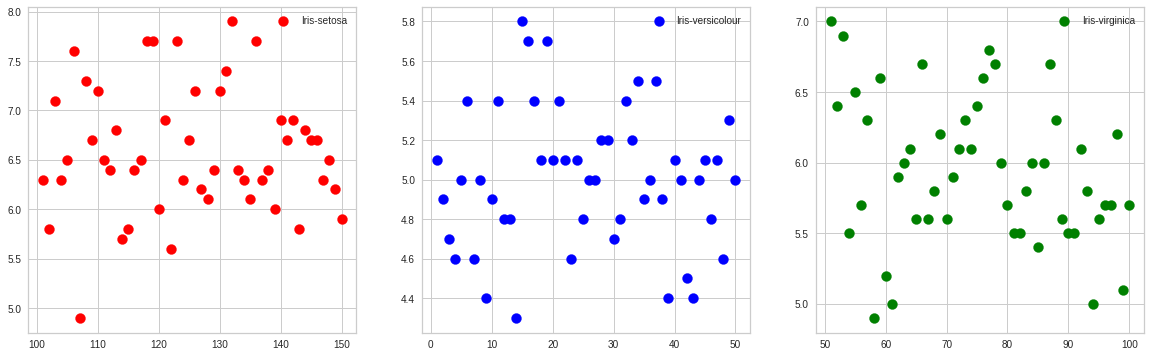

In [ ]:
#ploting seprate view
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

ax1.scatter(x[predicts == 0, 0], x[predicts == 0, 1], 
                s = 100, c = 'red', label = 'Iris-setosa')
ax2.scatter(x[predicts == 1, 0], x[predicts == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
ax3.scatter(x[predicts == 2, 0], x[predicts == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
ax1.legend()
ax2.legend()
ax3.legend();

#### Combined view with centroids

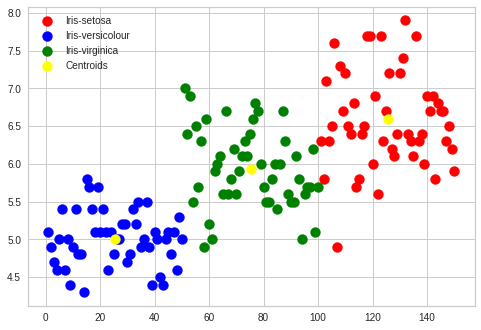

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[predicts == 0, 0], x[predicts == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predicts == 1, 0], x[predicts == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predicts == 2, 0], x[predicts == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend();